In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Skin Cancer Detection/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/Skin Cancer Detection/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                               batch_size=batch_size,validation_split=0.2,
                                                               subset='training',seed=123)
train_ds

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,image_size=(img_width,img_height),
                                                             batch_size=batch_size,validation_split=0.2,
                                                             subset='validation',seed=123)
val_ds

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


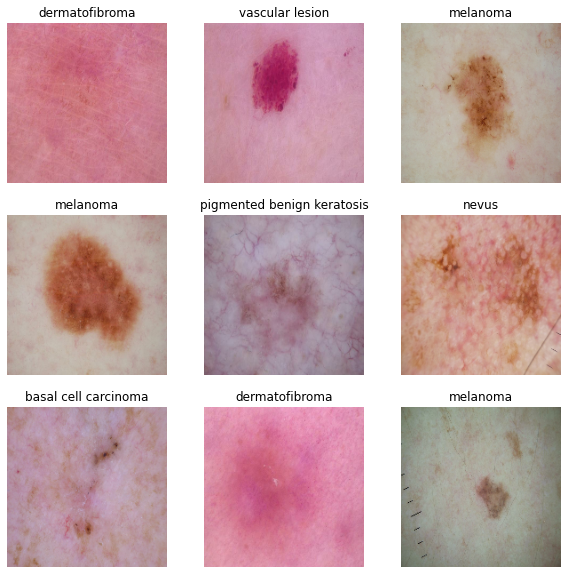

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
## Your code goes here

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 153s 765ms/step - loss: 1.8487 - accuracy: 0.2923 - val_loss: 1.5141 - val_accuracy: 0.4113
Epoch 2/20
169/169 [==============================] - 116s 688ms/step - loss: 1.3932 - accuracy: 0.4729 - val_loss: 1.3485 - val_accuracy: 0.5219
Epoch 3/20
169/169 [==============================] - 115s 680ms/step - loss: 1.1907 - accuracy: 0.5580 - val_loss: 1.1559 - val_accuracy: 0.5828
Epoch 4/20
169/169 [==============================] - 115s 684ms/step - loss: 0.9805 - accuracy: 0.6380 - val_loss: 0.9433 - val_accuracy: 0.6682
Epoch 5/20
169/169 [==============================] - 116s 688ms/step - loss: 0.7935 - accuracy: 0.7135 - val_loss: 0.8579 - val_accuracy: 0.6986
Epoch 6/20
169/169 [==============================] - 117s 690ms/step - loss: 0.6448 - accuracy: 0.7804 - val_loss: 0.8389 - val_accuracy: 0.7209
Epoch 7/20
169/169 [==============================] - 118s 699ms/step - loss: 0.5106 - accuracy: 0.8249 - val_loss: 0.8083 -

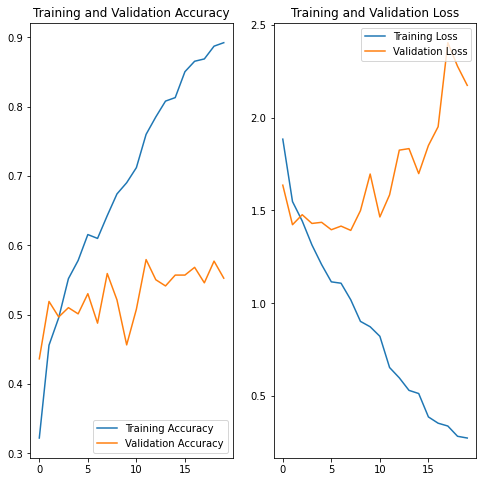

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

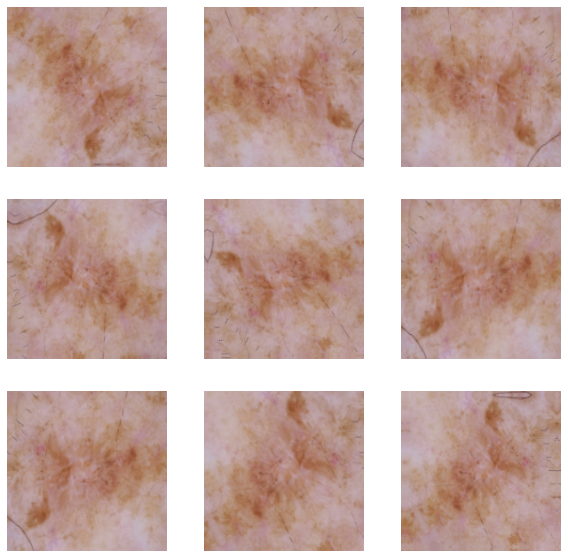

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
for batch,labels in train_ds.take(1):
  img=batch[0]
  img=tf.reshape(img,(1,img_width,img_height,3))

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
  augmented_image = data_augmentation(img)[0]
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image.numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Your code goes here, note: train your model for 20 epochs

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 44s 768ms/step - loss: 2.0559 - accuracy: 0.2690 - val_loss: 1.7108 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 43s 763ms/step - loss: 1.7067 - accuracy: 0.3873 - val_loss: 1.6020 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 42s 744ms/step - loss: 1.6138 - accuracy: 0.4252 - val_loss: 1.5575 - val_accuracy: 0.4385
Epoch 4/20
56/56 [==============================] - 42s 745ms/step - loss: 1.4763 - accuracy: 0.4844 - val_loss: 1.4436 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 42s 743ms/step - loss: 1.4253 - accuracy: 0.5061 - val_loss: 1.4202 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 45s 802ms/step - loss: 1.3738 - accuracy: 0.5206 - val_loss: 1.3472 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 45s 801ms/step - loss: 1.3040 - accuracy: 0.5363 - val_loss: 1.3395 - val_accuracy: 0.5570

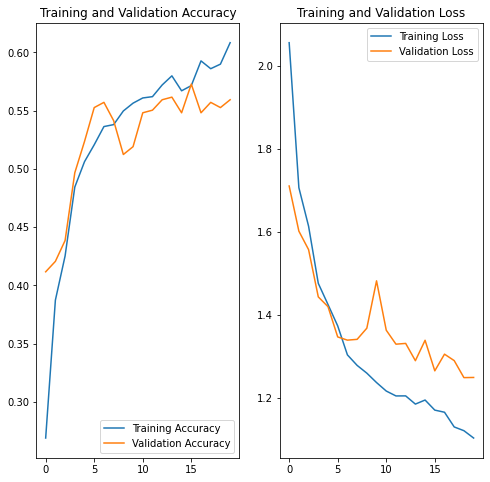

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

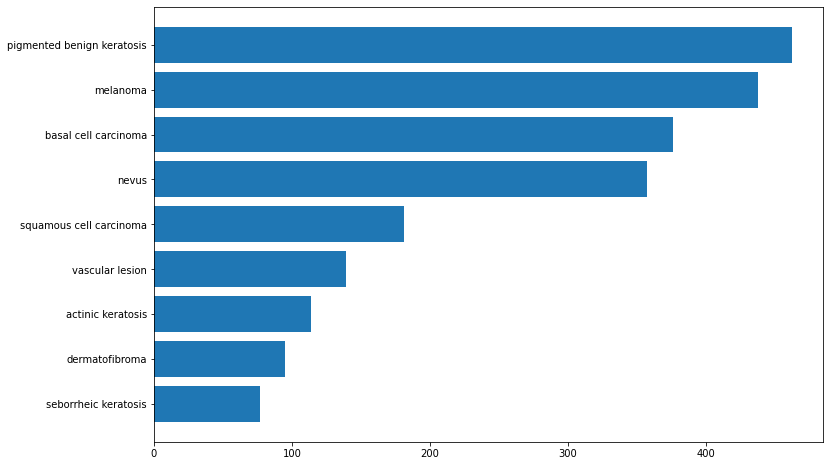

In [ ]:
## Your code goes here.

path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesions = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
df_dict = dict(zip(path_list, lesions))
original_df = pd.DataFrame(list(df_dict.items()),columns = ['Path','Label'])

cnt={}

for i in class_names:
    cnt[i] = len(list(data_dir_train.glob(f'{i}/*.jpg')))

cnt = dict(sorted(cnt.items(), key=lambda x: x[1]))

count_list = list(cnt.items())
x, y = zip(*count_list)
plt.figure(figsize=(12, 8))
plt.barh(x, y)
plt.show()


In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F891EA52150>: 100%|██████████| 500/500 [00:15<00:00, 31.97 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F891ED4D890>: 100%|██████████| 500/500 [00:14<00:00, 33.76 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F891ED5AD10>: 100%|██████████| 500/500 [00:15<00:00, 31.68 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F891ED4DA50>: 100%|██████████| 500/500 [01:12<00:00,  6.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F891EB04C90>: 100%|██████████| 500/500 [01:09<00:00,  7.15 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8923707210>: 100%|██████████| 500/500 [00:15<00:00, 32.73 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F891EB10790>: 100%|██████████| 500/500 [00:33<00:00, 14.86 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F891ED7DF50>: 100%|██████████| 500/500 [00:15<00:00, 32.77 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Skin Cancer Detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F891ED4DED0>: 100%|██████████| 500/500 [00:15<00:00, 32.39 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010883.jpg_4264fd9f-0c7e-421c-bad8-55d71dd205c3.jpg',
 '/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010863.jpg_b5f80ba4-b7ec-45e3-bc18-5f98ba5b7a75.jpg',
 '/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011128.jpg_91475cb6-e970-4e9b-9fdc-a11543742a36.jpg',
 '/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011040.jpg_6e08cf09-3f85-471e-9f05-5c9cc1020798.jpg',
 '/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010912.jpg_2c1d8e5e-3eaa-4ae6-9a3f-8cdd16a6944f.jpg',
 '/content/drive/My Drive/Skin Cancer Detection/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010876.jpg_c9bc2601-29

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
# dataframe_dict_new

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)
new_df.head()

,Path,Label
0,/content/drive/My Drive/Skin Cancer Detection/...,seborrheic keratosis
1,/content/drive/My Drive/Skin Cancer Detection/...,seborrheic keratosis
2,/content/drive/My Drive/Skin Cancer Detection/...,seborrheic keratosis
3,/content/drive/My Drive/Skin Cancer Detection/...,seborrheic keratosis
4,/content/drive/My Drive/Skin Cancer Detection/...,seborrheic keratosis


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
## your code goes here

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
## Your code goes here, use 50 epochs.

epochs = 50
history =model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 151s 884ms/step - loss: 1.9198 - accuracy: 0.2786 - val_loss: 1.6946 - val_accuracy: 0.3727
Epoch 2/50
169/169 [==============================] - 157s 927ms/step - loss: 1.5406 - accuracy: 0.4045 - val_loss: 1.4437 - val_accuracy: 0.4306
Epoch 3/50
169/169 [==============================] - 157s 923ms/step - loss: 1.4137 - accuracy: 0.4514 - val_loss: 1.3399 - val_accuracy: 0.4833
Epoch 4/50
169/169 [==============================] - 162s 957ms/step - loss: 1.3736 - accuracy: 0.4722 - val_loss: 1.3744 - val_accuracy: 0.4840
Epoch 5/50
169/169 [==============================] - 153s 900ms/step - loss: 1.3016 - accuracy: 0.4974 - val_loss: 1.2604 - val_accuracy: 0.5241
Epoch 6/50
169/169 [==============================] - 149s 878ms/step - loss: 1.2494 - accuracy: 0.5171 - val_loss: 1.3177 - val_accuracy: 0.5071
Epoch 7/50
169/169 [==============================] - 149s 877ms/step - loss: 1.2280 - accuracy: 0.5210 - val_loss: 1.3106 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **FINAL FINDINGS**

MODEL IS NOT UNDERFITTING
ACCURACY LEVEL HAS INCREASED SIGNIFICANTLY
ACCURACY IS NEAR TO 75 PERCENT
REBALANCING HAS HELPED 